<a href="https://colab.research.google.com/github/ozgetokmak/deep-learning/blob/master/kod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/deneme

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/deneme


In [ ]:
!gdown --id 1mGPU0GDuP6fZQtngBTcMZm3oQNCUwakc

Downloading...
From: https://drive.google.com/uc?id=1mGPU0GDuP6fZQtngBTcMZm3oQNCUwakc
To: /content/drive/MyDrive/deneme/son_goruntu.zip
5.02GB [01:35, 52.5MB/s]


In [ ]:
!unzip /content/drive/MyDrive/sonveri/son_goruntu.zip

Archive:  /content/drive/MyDrive/sonveri/son_goruntu.zip
replace sonuc/B_10240_11008.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import numpy as np
from numpy.linalg import norm
import pickle
from tqdm import tqdm, tqdm_notebook
import os
import random
import time
import math
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
def model_picker(name):
    if (name == 'vgg16'):
        model = VGG16(weights='imagenet',
                      include_top=False,
                      input_shape=(224, 224, 3),
                      pooling='max')
    elif (name == 'vgg19'):
        model = VGG19(weights='imagenet',
                      include_top=False,
                      input_shape=(224, 224, 3),
                      pooling='max')
    elif (name == 'resnet'):
        model = ResNet50(weights='imagenet',
                         include_top=False,
                         input_shape=(224, 224, 3),
                        pooling='max')
    else:
        print("Specified model not available")
    return model

In [ ]:
model_architecture = 'vgg16'
model = model_picker(model_architecture)

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
def extract_features(img_path, model):
    input_shape = (224, 224, 3)
    img = image.load_img(img_path,
                         target_size=(input_shape[0], input_shape[1]))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features)
    return normalized_features

In [ ]:
features = extract_features('sonuc/B_10240_11008.jpg', model)
print("Total length of features for one image: ", len(features))

Total length of features for one image:  512


In [ ]:
extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']
def get_file_list(root_dir):
    file_list = []
    counter = 1
    for root, directories, filenames in os.walk(root_dir):
        for filename in filenames:
            if any(ext in filename for ext in extensions):
                file_list.append(os.path.join(root, filename))
                counter += 1
    return file_list

In [ ]:
root_dir = '/content/besbin'
filenames = sorted(get_file_list(root_dir))
print(len(filenames))

0


In [ ]:
feature_list = []
for i in tqdm_notebook(range(len(filenames))):
    feature_list.append(extract_features(filenames[i], model))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/4953 [00:00<?, ?it/s]

In [ ]:
pickle.dump(feature_list, open('/content/drive/MyDrive/tubitak/besbinsonuc.pickle', 'wb'))
pickle.dump(filenames,open('/content/drive/MyDrive/tubitak/besbindosya.pickle', 'wb'))

In [ ]:
filenames = pickle.load(open('/content/drive/MyDrive/tubitak/besbindosya.pickle', 'rb'))
feature_list = pickle.load(open('/content/drive/MyDrive/tubitak/besbinsonuc.pickle', 'rb'))

In [ ]:
num_images = len(filenames)
num_features_per_image = len(feature_list[0])
print("Number of images = ", num_images)
print("Number of features per image = ", num_features_per_image)

Number of images =  4953
Number of features per image =  512


In [ ]:
neighbors = NearestNeighbors(n_neighbors=5,
                             algorithm='brute',
                             metric='euclidean').fit(feature_list)

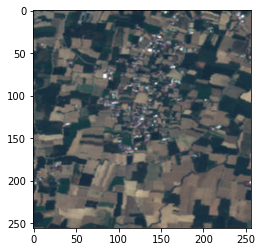

In [ ]:
random_index = 75
distances, indices = neighbors.kneighbors([feature_list[random_index]])
plt.imshow(mpimg.imread(filenames[random_index]), interpolation='lanczos')

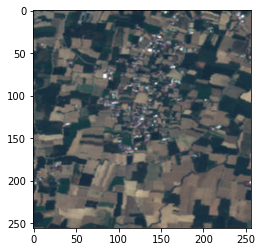

In [ ]:
plt.imshow(mpimg.imread(filenames[indices[0][0]]), interpolation='lanczos')

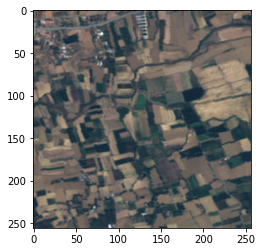

In [ ]:
plt.imshow(mpimg.imread(filenames[indices[0][1]]), interpolation='lanczos')

In [ ]:
for i in range(5):
    print(distances[0][i])

0.0
0.602284
0.61341083
0.613546
0.62232834


In [ ]:
# Helper function to get the classname
def classname(str):
    return str.split('/')[-2]


# Helper function to get the classname and filename
def classname_filename(str):
    return str.split('/')[-2] + '/' + str.split('/')[-1]


# Helper functions to plot the nearest images given a query image
def plot_images(filenames, distances):
    images = []
    for filename in filenames:
        images.append(mpimg.imread(filename))
    plt.figure(figsize=(20, 10))
    columns = 5
    for i, image in enumerate(images):
        ylabel = plt.subplot(len(images) / columns+1 , columns, i + 1)
        
        if i == 0:
            plt.ylabel("Query image\n" + classname_filename(filenames[i]))
        else:
            plt.ylabel("Similar Image\n" + classname_filename(filenames[i]))
                         
            plt.title("\nDistance: " + str(float("{0:.2f}".format(distances[i]))))
        plt.imshow(image)
        # To save the plot in a high definition format i.e. PDF, uncomment the following line:
        #plt.savefig('results/' + str(random.randint(0,10000))+'.pdf', format='pdf', dpi=1000)
        # We will use this line repeatedly in our code.

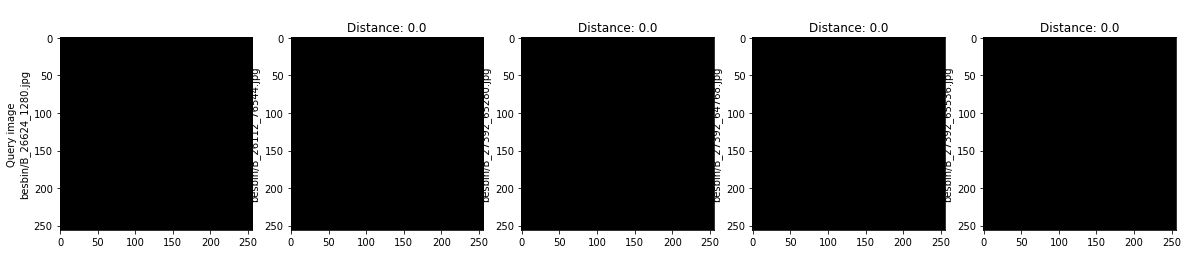

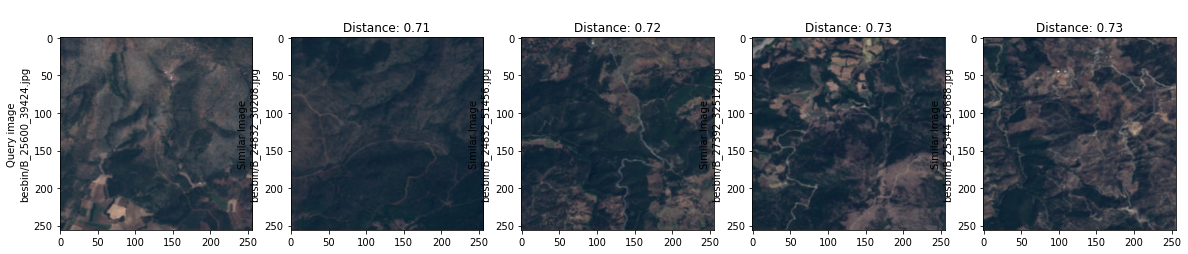

In [ ]:
for i in range(2):
    random_image_index = random.randint(0, num_images)
    distances, indices = neighbors.kneighbors(
        [feature_list[random_image_index]])
    # Don't take the first closest image as it will be the same image
    similar_image_paths = [filenames[random_image_index]] + \
        [filenames[indices[0][i]] for i in range(1, 5)]
    plot_images(similar_image_paths, distances[0])

In [ ]:
neighbors = NearestNeighbors(n_neighbors=len(feature_list),
                             algorithm='brute',
                             metric='euclidean').fit(feature_list)
distances, indices = neighbors.kneighbors(feature_list)

# Calculating some stats
print("Median distance between all photos: ", np.median(distances))
print("Max distance between all photos: ", np.max(distances))
print("Median distance among most similar photos: ",
      np.median(distances[:, 2]))

Median distance between all photos:  1.03274
Max distance between all photos:  1.375046
Median distance among most similar photos:  0.6320011


In [ ]:
num_feature_dimensions = 100
pca = PCA(n_components=num_feature_dimensions)
pca.fit(feature_list)
feature_list_compressed = pca.transform(feature_list)

In [ ]:
neighbors = NearestNeighbors(n_neighbors=20,
                             algorithm='brute',
                             metric='euclidean').fit(feature_list_compressed)
distances, indices = neighbors.kneighbors([feature_list_compressed[0]])

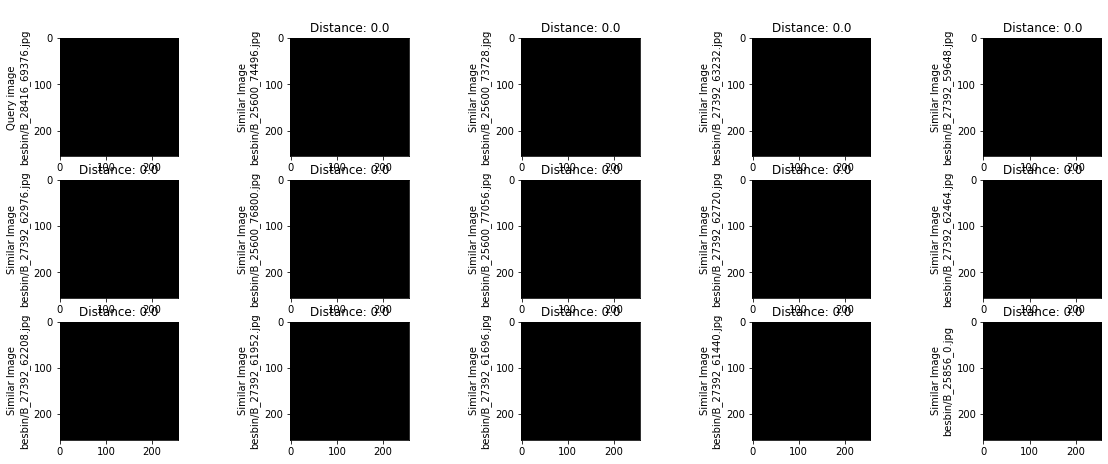

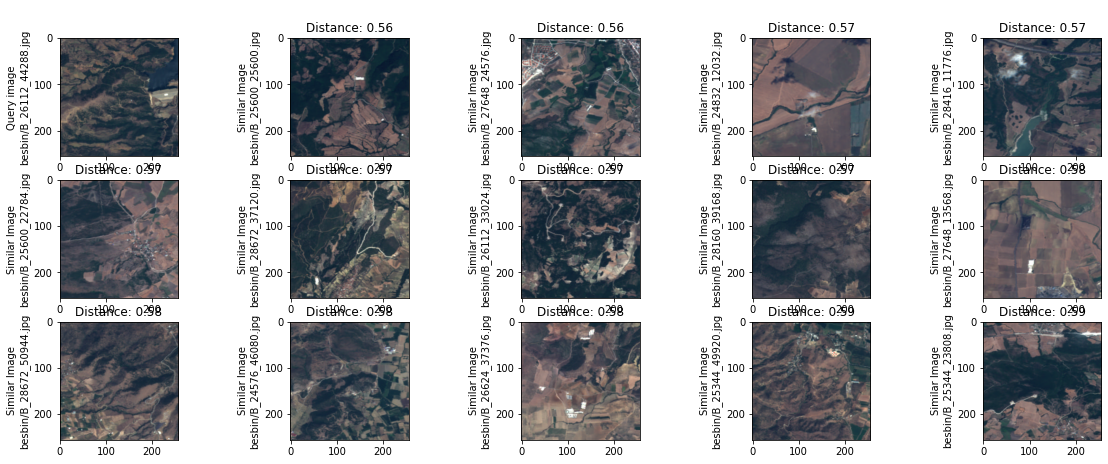

In [ ]:
for i in range(2):
    random_image_index = random.randint(0, num_images)
    distances, indices = neighbors.kneighbors(
        [feature_list_compressed[random_image_index]])
    # Don't take the first closest image as it will be the same image
    similar_image_paths = [filenames[random_image_index]] + \
        [filenames[indices[0][i]] for i in range(1, 15)]
    plot_images(similar_image_paths, distances[0])